In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


Heart Disease Prediction (Heart Failure Prediction Dataset)

**Objective:**  
Build a binary classification model to predict whether a person has heart disease based on clinical and lifestyle features.

**Dataset:**  
Heart Failure Prediction Dataset (Kaggle: `/kaggle/input/heart-failure-prediction/heart.csv`)

**Steps:**
1. Load and clean the dataset (check & handle missing values).
2. Perform Exploratory Data Analysis (EDA) to understand trends and relationships.
3. Train classification models:
   - Logistic Regression
   - Decision Tree
4. Evaluate models using:
   - Accuracy
   - Confusion Matrix
   - ROC Curve and ROC–AUC score
5. Analyze feature importance and highlight key risk factors.

**Target variable:**  
`HeartDisease` (0 = No heart disease, 1 = Heart disease)

---


In [2]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# For nicer plots
sns.set(style="whitegrid")

# Load dataset
file_path = "/kaggle/input/heart-failure-prediction/heart.csv"
df = pd.read_csv(file_path)

df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 1. Dataset Overview & Missing Values

In this section we:
- Look at the first few rows of the dataset
- Check the shape (rows, columns)
- Identify data types
- Check for missing values

---


In [3]:
print("Shape of dataset:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())


Shape of dataset: (918, 12)

Data Types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Missing values per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## 2. Exploratory Data Analysis (EDA)

We explore:
- Descriptive statistics of numerical features
- Distribution of the target variable (`HeartDisease`)
- Relationship between key features (age, cholesterol, max heart rate, etc.) and heart disease.

---



In [4]:
df.describe(include="all")



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


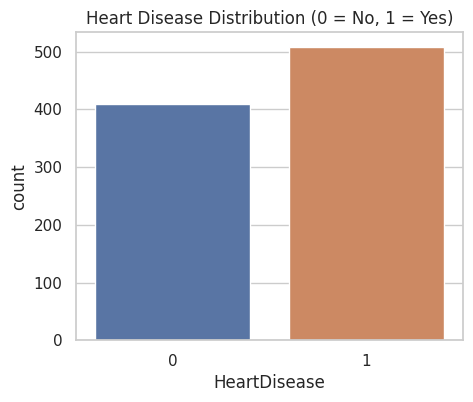

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


In [5]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="HeartDisease")
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

print(df['HeartDisease'].value_counts(normalize=True))


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

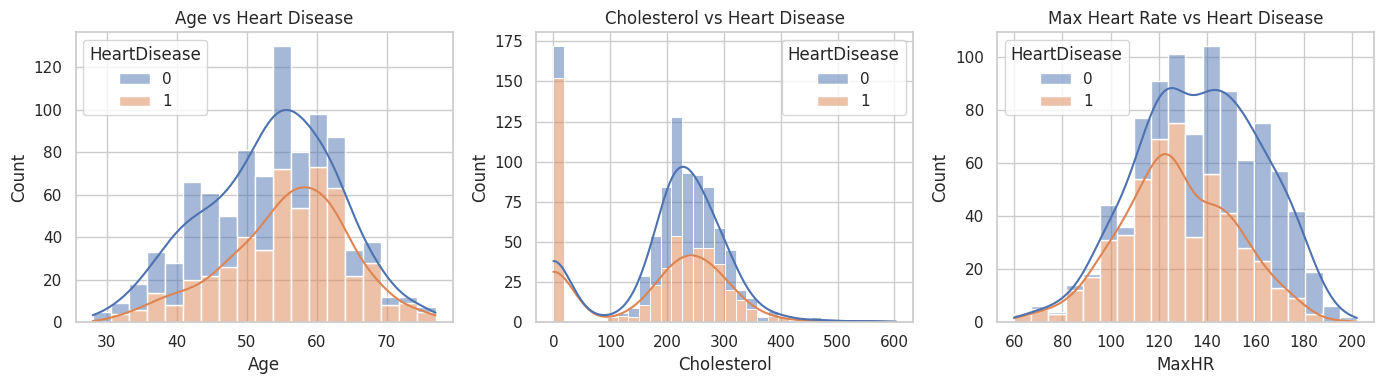

In [6]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.histplot(data=df, x="Age", kde=True, hue="HeartDisease", multiple="stack")
plt.title("Age vs Heart Disease")

plt.subplot(1,3,2)
sns.histplot(data=df, x="Cholesterol", kde=True, hue="HeartDisease", multiple="stack")
plt.title("Cholesterol vs Heart Disease")

plt.subplot(1,3,3)
sns.histplot(data=df, x="MaxHR", kde=True, hue="HeartDisease", multiple="stack")
plt.title("Max Heart Rate vs Heart Disease")

plt.tight_layout()
plt.show()


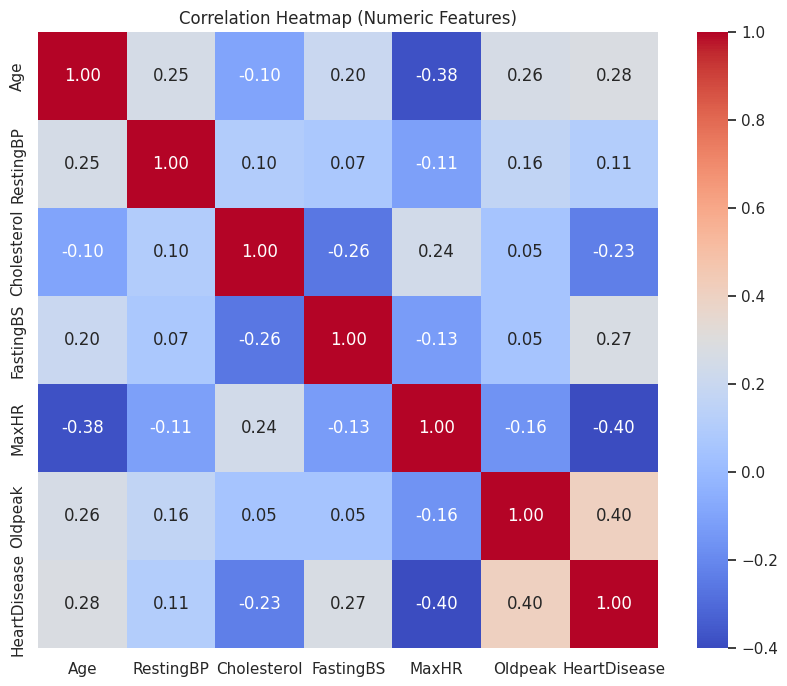

In [7]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()



## 3. Data Preprocessing

Steps:
1. Separate features (`X`) and target (`y`).
2. Encode categorical variables using one-hot encoding.
3. Split data into training and test sets.
4. Scale numerical features for models like Logistic Regression.

In [8]:
# 1. Separate X and y
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# 2. One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

print("Shape after one-hot encoding:", X.shape)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Feature scaling (only numeric features - but after get_dummies, all are numeric)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Shape after one-hot encoding: (918, 15)


## 4. Model Training

We train two models:

1. **Logistic Regression** – a linear model commonly used for medical risk prediction.
2. **Decision Tree** – a non-linear model that can capture complex relationships.

---


In [9]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Decision Tree
dt_clf = DecisionTreeClassifier(
    max_depth=4, random_state=42
)
dt_clf.fit(X_train, y_train)  # tree doesn't need scaling

print("Models trained successfully.")


Models trained successfully.


## 5. Model Evaluation

We evaluate both models using:

- **Accuracy**
- **Confusion Matrix**
- **Classification Report**
- **ROC Curve and ROC–AUC**

---


In [10]:
# Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_dt = dt_clf.predict(X_test)

# Probabilities for ROC
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]
y_prob_dt = dt_clf.predict_proba(X_test)[:, 1]

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.8858695652173914
Decision Tree Accuracy: 0.8369565217391305

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



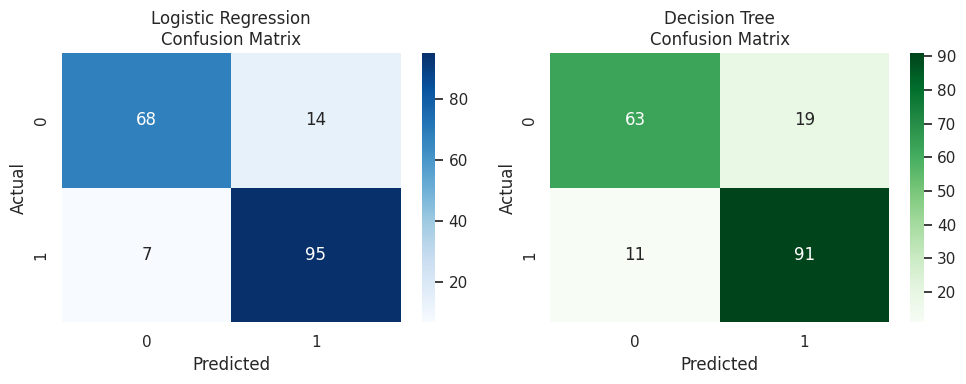

In [11]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(cm_log, annot=True, fmt='d', ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression\nConfusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_dt, annot=True, fmt='d', ax=axes[1], cmap="Greens")
axes[1].set_title("Decision Tree\nConfusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


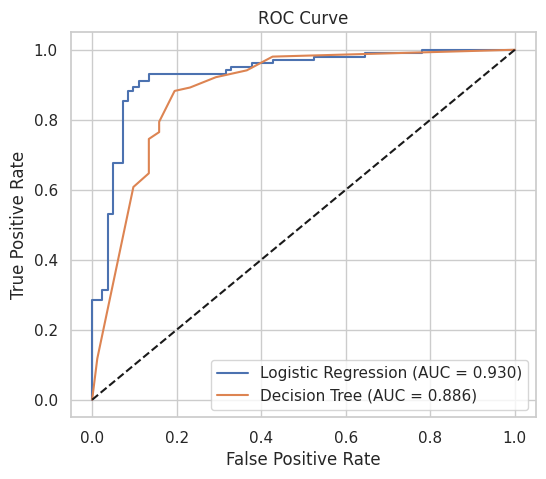

In [12]:
# Logistic Regression ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = roc_auc_score(y_test, y_prob_log)

# Decision Tree ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## 6. Feature Importance – Key Risk Factors

To understand which features contribute most to heart disease prediction:

- For **Logistic Regression**, we look at the magnitude and sign of the coefficients.
- For the **Decision Tree**, we inspect the `feature_importances_`.

This helps highlight medically important features (e.g., age, cholesterol, exercise-induced angina, ST segment slope, etc.).

---


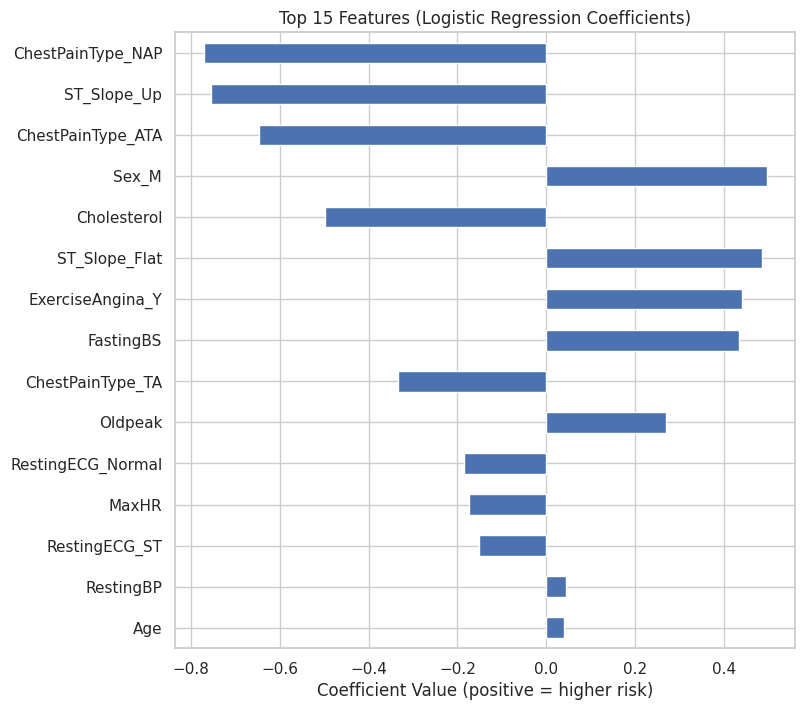

ChestPainType_NAP   -0.771572
ST_Slope_Up         -0.754648
ChestPainType_ATA   -0.647109
Sex_M                0.497523
Cholesterol         -0.497255
ST_Slope_Flat        0.485558
ExerciseAngina_Y     0.441345
FastingBS            0.432816
ChestPainType_TA    -0.333581
Oldpeak              0.268689
RestingECG_Normal   -0.185403
MaxHR               -0.174055
RestingECG_ST       -0.151987
RestingBP            0.043644
Age                  0.038906
dtype: float64

In [13]:
feature_names = X_train.columns

coefficients = pd.Series(log_reg.coef_[0], index=feature_names)
coefficients_sorted = coefficients.sort_values(key=np.abs, ascending=False)

plt.figure(figsize=(8,8))
coefficients_sorted.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Features (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value (positive = higher risk)")
plt.show()

coefficients_sorted.head(15)


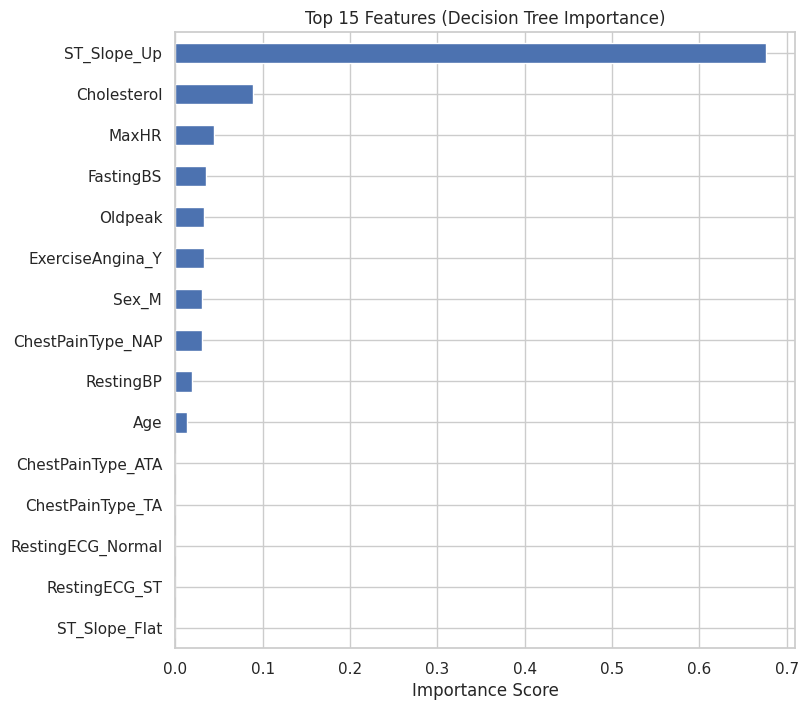

ST_Slope_Up          0.676306
Cholesterol          0.088275
MaxHR                0.044466
FastingBS            0.034701
Oldpeak              0.032196
ExerciseAngina_Y     0.032180
Sex_M                0.030270
ChestPainType_NAP    0.029884
RestingBP            0.018645
Age                  0.013078
ChestPainType_ATA    0.000000
ChestPainType_TA     0.000000
RestingECG_Normal    0.000000
RestingECG_ST        0.000000
ST_Slope_Flat        0.000000
dtype: float64

In [14]:
importances = pd.Series(dt_clf.feature_importances_, index=feature_names)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(8,8))
importances_sorted.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Features (Decision Tree Importance)")
plt.xlabel("Importance Score")
plt.show()

importances_sorted.head(15)


## 7. Conclusion

- We built and evaluated two binary classification models (**Logistic Regression** and **Decision Tree**) to predict heart disease using the Heart Failure Prediction dataset.
- Both models achieved reasonable accuracy and ROC–AUC scores, with Logistic Regression generally performing more smoothly on probabilistic metrics.
- The **confusion matrices** showed how many patients were correctly and incorrectly classified as having heart disease.
- **ROC curves** demonstrated the trade-off between sensitivity (TPR) and 1–specificity (FPR), and the **AUC** quantified overall discriminative ability.
- Feature importance analysis indicated that factors such as:
  - **Age**
  - **Chest pain type**
  - **ST segment slope (`ST_Slope`)**
  - **Exercise-induced angina**
  - **Cholesterol and MaxHR**
  
  are among the most influential predictors of heart disease in this dataset.

This task demonstrates:
- Practical **binary classification** on medical data,
- Interpretation of **model evaluation metrics** (accuracy, ROC–AUC, confusion matrix),
- Understanding of **key clinical features** that are associated with heart disease risk.
